# Toy Problem

Look at 2D problem with competing ROIs to demonstrate problem and compare grid search, random search, and Bayesian search.

## Constituent Functions

Terms | Roi | FunctionType | DoseLevel | Weight
-|-|-|-|-
0 | PTV | MinDose | 6270 | 1
1 | PTV | MaxDose | 7550 | 1
2 | Esophagus | MaxDose | 6930 | 1


## Clinical Goals

Roi | Type | GoalCriteria | AcceptanceLevel | ParameterValue
-|-|-|-|-
PTV | MinDvh | AtLeast | 0.99 | 6270
PTV | MaxDose | AtMost | 7550 | N/A
Esophagus | MaxDose | AtMost | 6930 | N/A

## Experiments
* Vary DoseLevel parameters 6271-7550 and 3465-6930
* Vary Weight parameters 1e0-1e4
* Vary both DoseLevel and Weight parameters

## Methods
* Grid search
* Random search
* Bayesian search (try different surrogate functions?)

Story is that there are two cases of parameter tuning we consider

1. Easy problem
2. Hard problem

There are also two types of parameter tuning we consider

1. Weights
2. Doses

For easy problems, weights might not really do much, but we can decrease dose to OAR by tuning doses.

For hard problems, doses might work, but they also might not. In this case, would tuning the weigths be more effective? Or both? 

We could always add weights to the score terms... lots of ways to formulate this,
don't get too caught up in which way we do it or trying all possible ways of doing it.

In [1]:
from importlib import reload
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append('../../src')
import plots

In [2]:
# Load results
funcs = pd.read_csv('funcs_grid.csv')
goals = pd.read_csv('goals.csv')
pars = pd.read_pickle('pars_grid.npy')
results = pd.read_pickle('results_grid.npy')

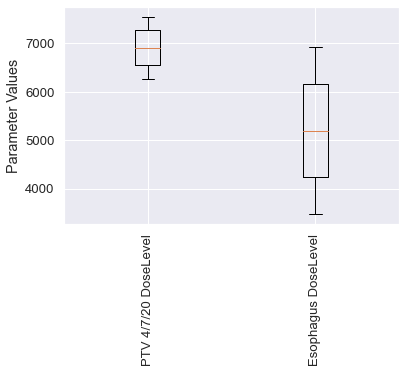

In [4]:
# Constituent function parameter values
plots.boxplot(funcs, pars, 'pars')

Lowest PTV Max Dose Found: 7558.35 cGy


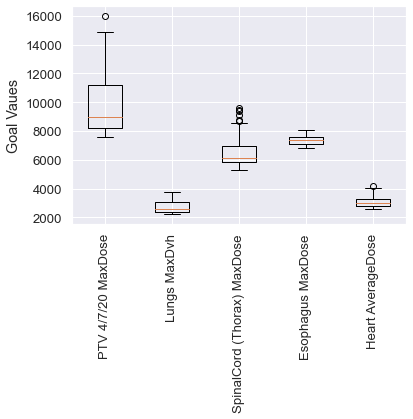

In [5]:
# Clinical goal results
plots.boxplot(goals[1:], results, 'goals')
print(f'Lowest PTV Max Dose Found: {min(results[1]):.2f} cGy')

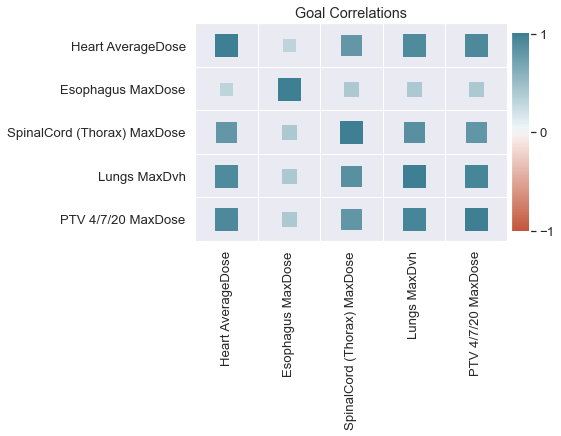

In [8]:
# Goal correlations
plots.corrplot(goals[1:], results, title='Goal Correlations')

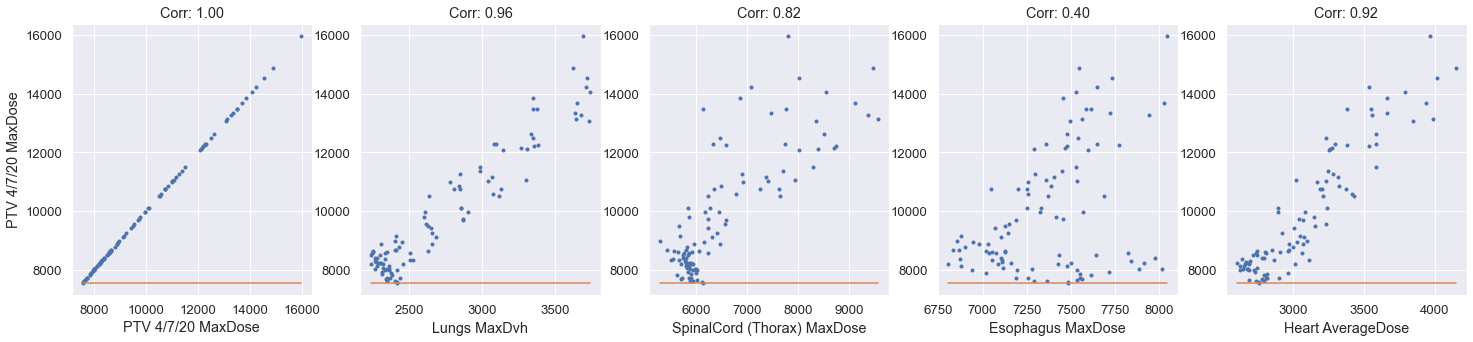

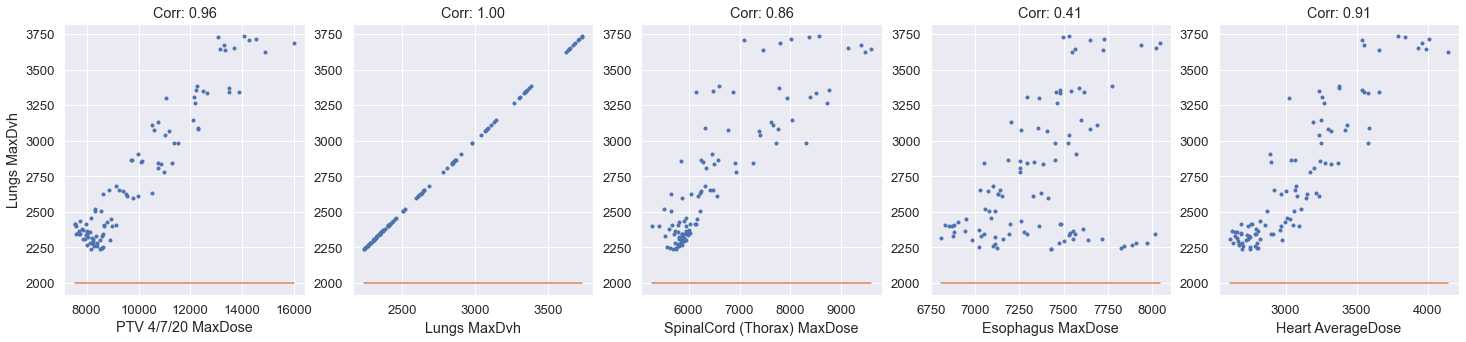

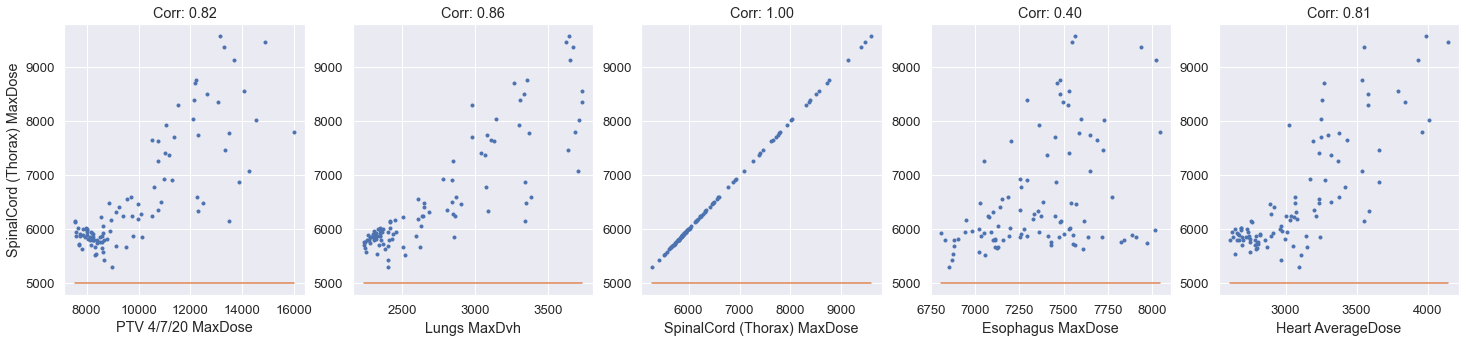

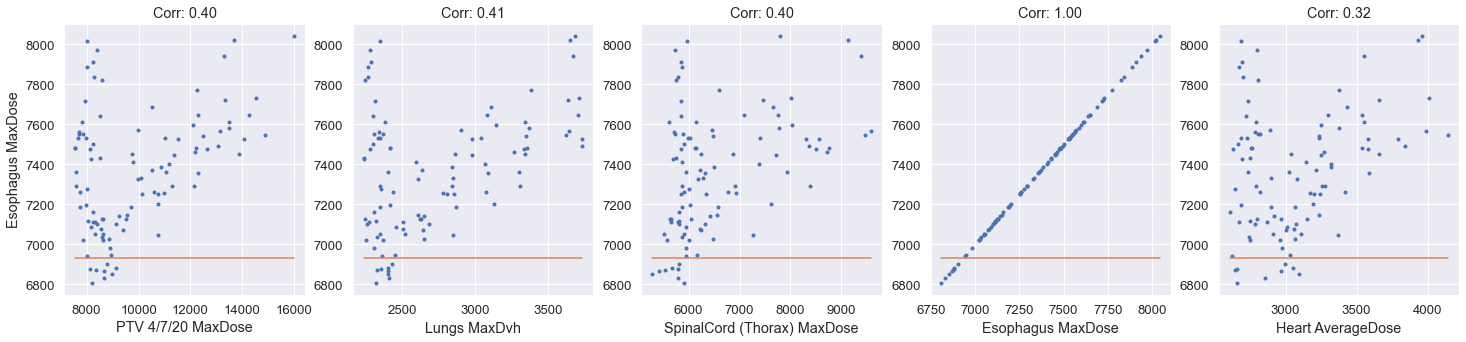

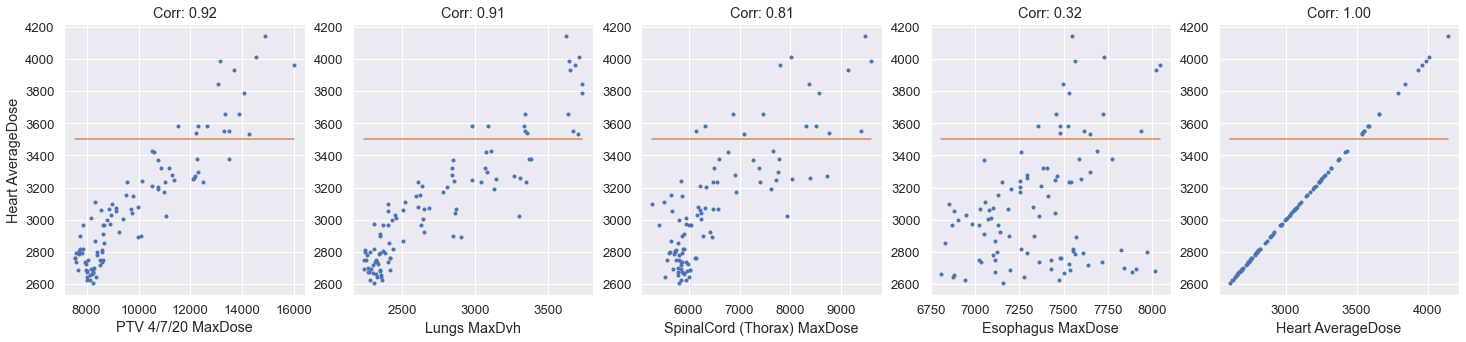

In [10]:
# Goal scatterplots
plots.scatterplot(goals[1:], results)

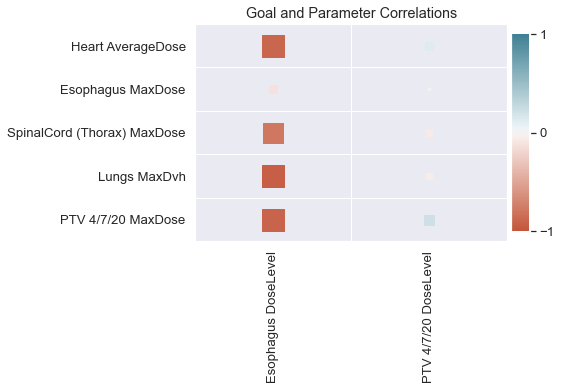

In [13]:
# Goal and parameters correlation
plots.corrplot(goals[1:], results, funcs, pars, 'Goal and Parameter Correlations')

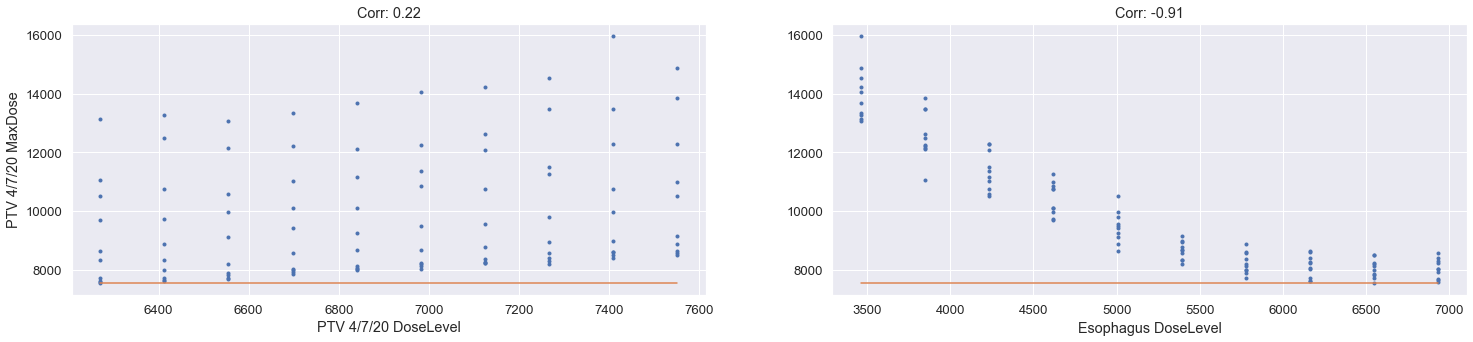

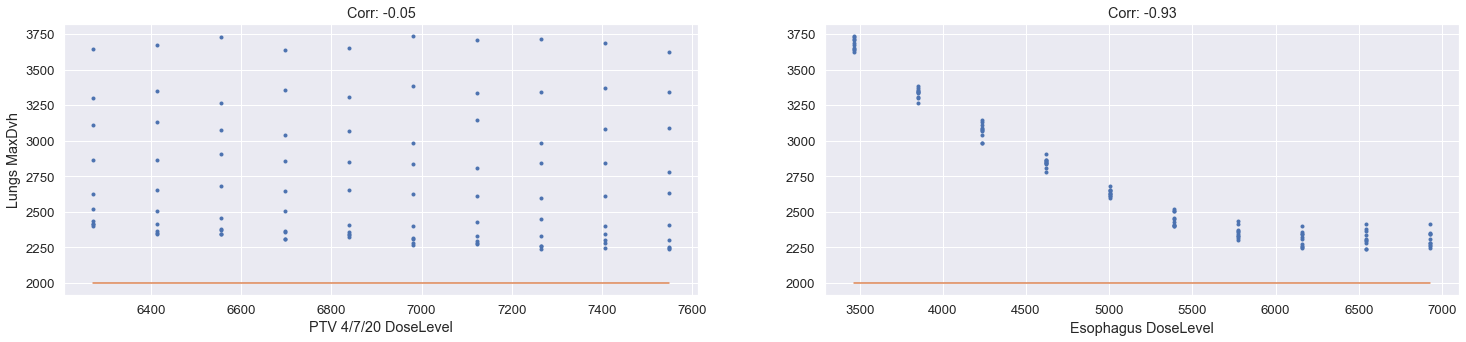

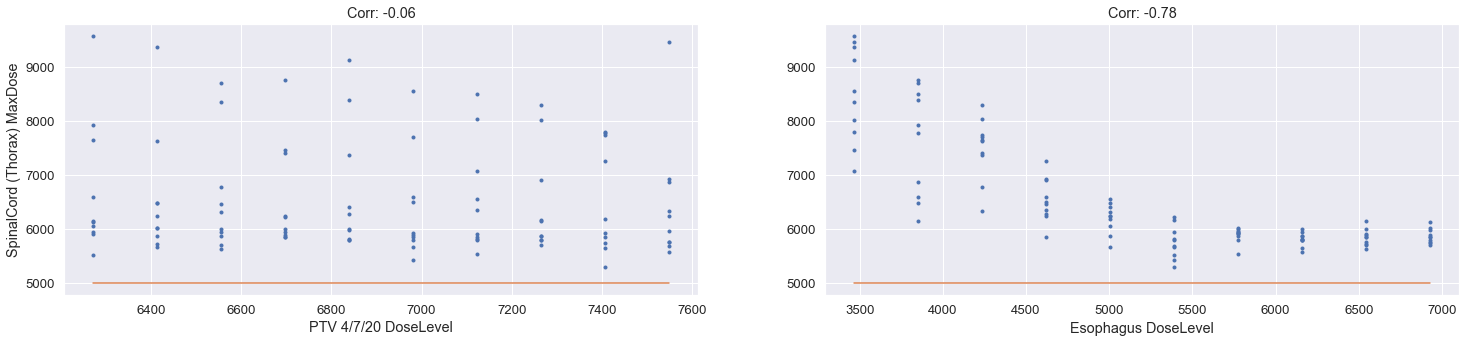

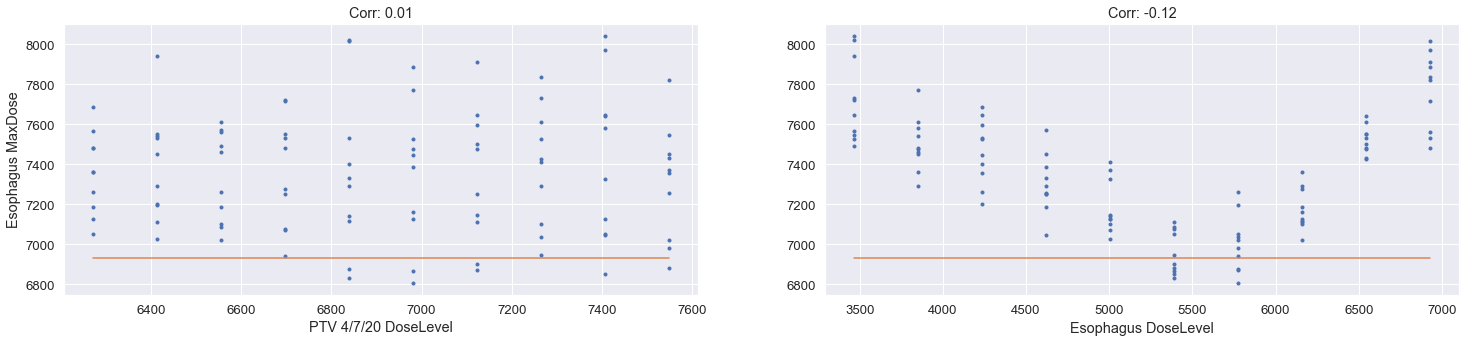

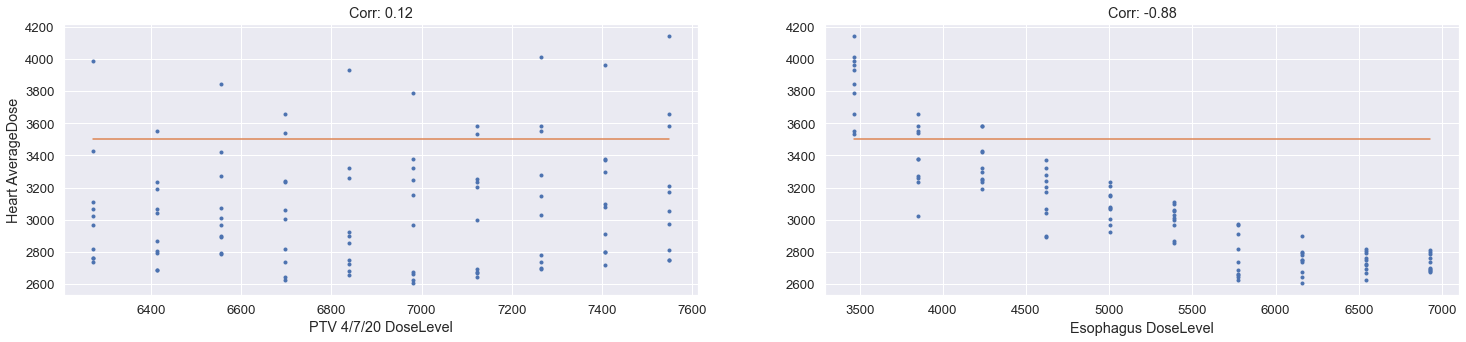

In [14]:
# Goal and parameter scatterplots
plots.scatterplot(goals[1:], results, funcs, pars)

In [60]:
# 2D plots

eso_pars = list(set(pars[pars['Term'] == 4]['DoseLevel']))
eso_pars.sort()
ptv_pars = list(set(pars[pars['Term'] == 1]['DoseLevel']))
ptv_pars.sort()

eso_max = results[4]
ptv_max = results[1]

In [82]:
eso_results = np.zeros((10, 10))
ptv_results = np.zeros((10, 10))
for sample in range(100):
    eso_results[np.mod(sample, 10), sample // 10] = eso_max[sample]
    ptv_results[np.mod(sample, 10), sample // 10] = ptv_max[sample]

Lowest PTV MaxDose: 7558.353515625, PTV DoseLevel: 6271.0, Esophagus DoseLevel: 6545.0


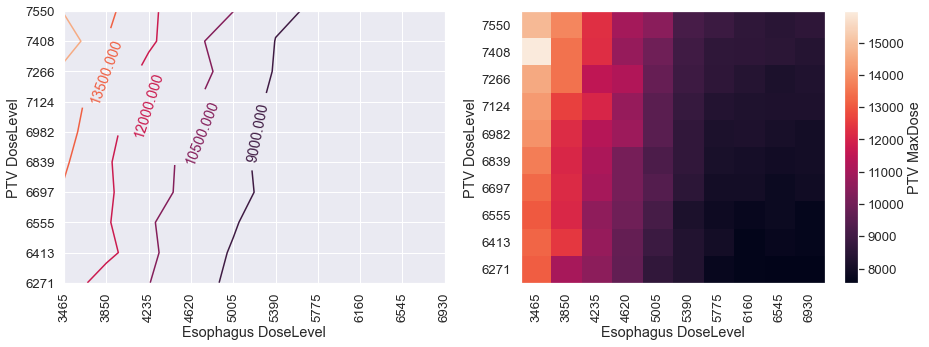

In [109]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Contour plot
im0 = ax[0].contour(ptv_results)
ax[0].clabel(im0)
ax[0].set_xticks(np.arange(10))
ax[0].set_xticklabels(labels=[round(p) for p in eso_pars], rotation=90)
ax[0].set_xlabel('Esophagus DoseLevel')
ax[0].set_yticks(np.arange(10))
ax[0].set_yticklabels(labels=[round(p) for p in ptv_pars])
ax[0].set_ylabel('PTV DoseLevel')

# Heatmap
im1 = ax[1].imshow(ptv_results, origin='lower')
ax[1].set_xticks(np.arange(10))
ax[1].set_xticklabels(labels=[round(p) for p in eso_pars], rotation=90)
ax[1].set_xlabel('Esophagus DoseLevel')
ax[1].set_yticks(np.arange(10))
ax[1].set_yticklabels(labels=[round(p) for p in ptv_pars])
ax[1].set_ylabel('PTV DoseLevel')
ax[1].axis('auto')
plt.colorbar(im1, label='PTV MaxDose')
ax[1].grid(False)

idx = np.argmin(ptv_max)
print(f'Lowest PTV MaxDose: {ptv_max[idx]}, PTV DoseLevel: {ptv_pars[np.mod(idx, 10)]}, Esophagus DoseLevel: {eso_pars[idx // 10]}')

In [110]:
results.iloc[idx]

Sample      80.000000
Flag         0.000000
0         6270.000117
1         7558.353516
2         2414.474189
3         6147.146973
4         7483.879883
5         2759.180703
Name: 80, dtype: float64

In [111]:
pars[pars['Sample'] == idx]

,Sample,Term,Roi,DoseLevel,PercentVolume,EudParameterA,Weight
480,80,0,PTV 4/7/20,6270.0,0.0,NaN,1
481,80,1,PTV 4/7/20,6271.0,0.0,NaN,1
482,80,2,Lungs,2000.0,35.0,NaN,1
483,80,3,SpinalCord (Thorax),5000.0,0.0,NaN,1
484,80,4,Esophagus,6545.0,0.0,NaN,1
485,80,5,Heart,3500.0,NaN,1.0,1


Lowest Esophagus MaxDose: 6806.97900390625, PTV DoseLevel: 6981.555555555556, Esophagus DoseLevel: 5775.0


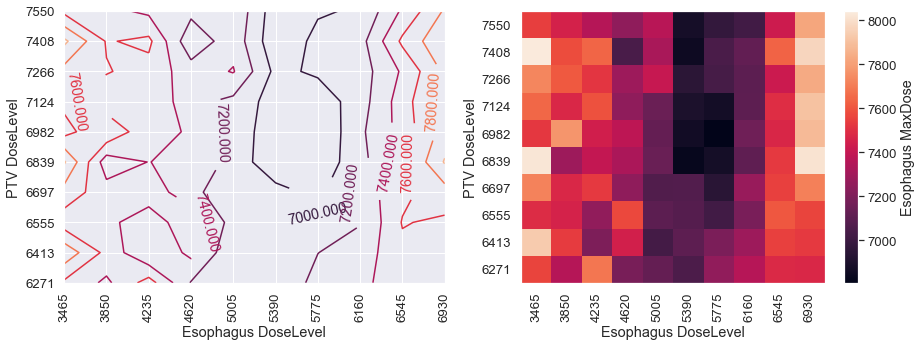

In [104]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Contour plot
im0 = ax[0].contour(eso_results)
ax[0].clabel(im0)
ax[0].set_xticks(np.arange(10))
ax[0].set_xticklabels(labels=[round(p) for p in eso_pars], rotation=90)
ax[0].set_xlabel('Esophagus DoseLevel')
ax[0].set_yticks(np.arange(10))
ax[0].set_yticklabels(labels=[round(p) for p in ptv_pars])
ax[0].set_ylabel('PTV DoseLevel')

# Heatmap
im1 = ax[1].imshow(eso_results, origin='lower')
ax[1].set_xticks(np.arange(10))
ax[1].set_xticklabels(labels=[round(p) for p in eso_pars], rotation=90)
ax[1].set_xlabel('Esophagus DoseLevel')
ax[1].set_yticks(np.arange(10))
ax[1].set_yticklabels(labels=[round(p) for p in ptv_pars])
ax[1].set_ylabel('PTV DoseLevel')
ax[1].axis('auto')
plt.colorbar(im1, label='Esophagus MaxDose')
ax[1].grid(False)

idx = np.argmin(eso_max)
print(f'Lowest Esophagus MaxDose: {eso_max[idx]}, PTV DoseLevel: {ptv_pars[np.mod(idx, 10)]}, Esophagus DoseLevel: {eso_pars[idx // 10]}')

Score: -0.0566, PTV MaxDose: 6555.22, Esophagus MaxDose: 5775.0
PTV DoseLevel: 7876.62, Esophagus DoseLevel: 7022.19


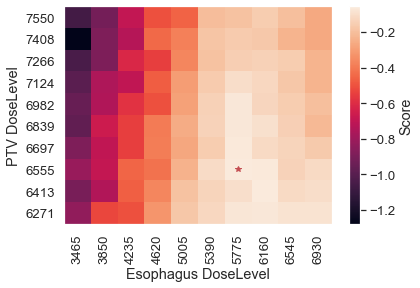

In [172]:
# Linear penaty

score1 = (7550 - ptv_results)/7550 + (6930 - eso_results)/6930
plt.imshow(score1, origin='lower')
plt.xticks(ticks=np.arange(10), labels=[round(p) for p in eso_pars], rotation=90)
plt.xlabel('Esophagus DoseLevel')
plt.yticks(ticks=np.arange(10), labels=[round(p) for p in ptv_pars])
plt.ylabel('PTV DoseLevel')
plt.colorbar(label='Score')
plt.grid(False)
plt.axis('auto')

coord = np.unravel_index(np.argmax(score1), score1.shape)
plt.plot(coord[1], coord[0], 'r*')

print(f'Score: {np.max(score1):.4f}, PTV MaxDose: {ptv_pars[coord[0]]:.2f}, Esophagus MaxDose: {eso_pars[coord[1]]}')
print(f'PTV DoseLevel: {ptv_results[coord[:]]:.2f}, Esophagus DoseLevel: {eso_results[coord[:]]:.2f}')

In [175]:
ptv_max

0     13134.134766
1     13273.132812
2     13073.721680
3     13345.865234
4     13689.699219
          ...     
95     8009.144043
96     8234.333984
97     8284.458984
98     8403.867188
99     8579.848633
Name: 1, Length: 100, dtype: float64

Text(0, 0.5, 'Score')

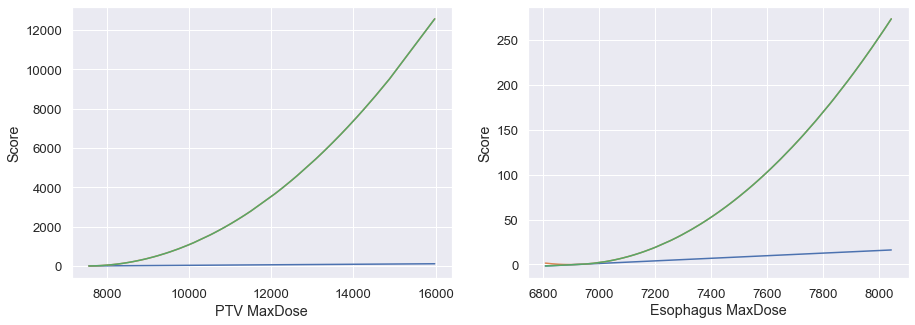

In [184]:
# Linear + quadratic (for one or both?)
# Barrier function (for one or both? - clearly we can't satisfy both goals)

temp = list(set(ptv_max))
temp.sort()
temp = np.array(temp)

max_val = 7550
dx = -max_val/200
dy = -1/4
f = lambda x: 100*(x - max_val)/max_val
g = lambda x: f(x - dx)**2 + dy
h = lambda x: (x <= max_val)*f(x) + (x > max_val)*g(x)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(temp, f(temp))
ax[0].plot(temp, g(temp))
ax[0].plot(temp, h(temp))
ax[0].set_xlabel('PTV MaxDose')
ax[0].set_ylabel('Score')

temp = list(set(eso_max))
temp.sort()
temp = np.array(temp)

max_val = 6930
dx = -max_val/200
dy = -1/4
f = lambda x: 100*(x - max_val)/max_val
g = lambda x: f(x - dx)**2 + dy
h = lambda x: (x <= max_val)*f(x) + (x > max_val)*g(x)

ax[1].plot(temp, f(temp))
ax[1].plot(temp, g(temp))
ax[1].plot(temp, h(temp))
ax[1].set_xlabel('Esophagus MaxDose')
ax[1].set_ylabel('Score')

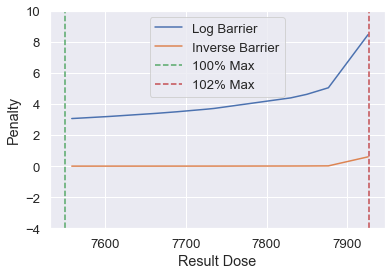

In [208]:
# Doesn't make sense to use barrier function for PTV when we are always above the value!

percent = 1.05

temp = list(set(ptv_max))
temp.sort()
temp = np.array(temp)
max_val = 7550

def f(x, b):
    if x < b:
        return -np.log(b - x) + np.log(percent*max_val)
    else:
        return np.inf
def g(x, b):
    if x < b:
        return 1/(b - x)
    else:
        return np.inf
plt.plot(temp, [f(val, percent*max_val) for val in temp])
plt.plot(temp, [g(val, percent*max_val) for val in temp])
plt.plot([max_val, max_val], [-4, 10], '--')
plt.plot([percent*max_val, percent*max_val], [-4, 10], '--')
plt.ylim([-4, 10])
plt.xlabel('Result Dose')
plt.ylabel('Penalty')
plt.legend(['Log Barrier', 'Inverse Barrier', '100% Max', '102% Max']);

In [127]:
score1[8, 0]

-1.2769667606469137

In [123]:
np.min(score1)

-1.2769667606469137

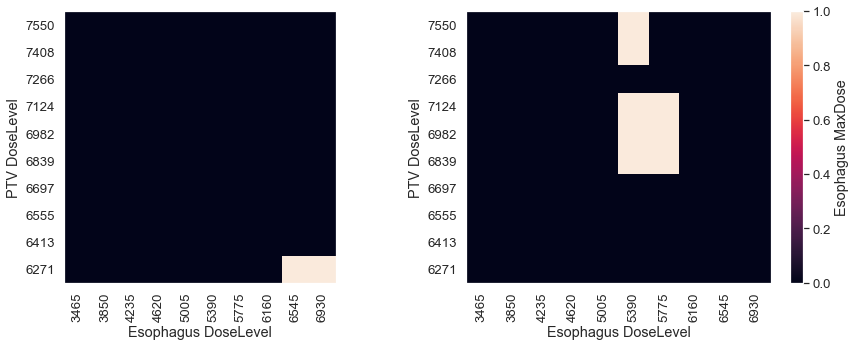

In [112]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Contour plot
im0 = ax[0].imshow(ptv_results <= 7600, origin='lower')
ax[0].set_xticks(np.arange(10))
ax[0].set_xticklabels(labels=[round(p) for p in eso_pars], rotation=90)
ax[0].set_xlabel('Esophagus DoseLevel')
ax[0].set_yticks(np.arange(10))
ax[0].set_yticklabels(labels=[round(p) for p in ptv_pars])
ax[0].set_ylabel('PTV DoseLevel')
ax[0].grid(False)

# Heatmap
im1 = ax[1].imshow(eso_results <= 6930, origin='lower')
ax[1].set_xticks(np.arange(10))
ax[1].set_xticklabels(labels=[round(p) for p in eso_pars], rotation=90)
ax[1].set_xlabel('Esophagus DoseLevel')
ax[1].set_yticks(np.arange(10))
ax[1].set_yticklabels(labels=[round(p) for p in ptv_pars])
ax[1].set_ylabel('PTV DoseLevel')
ax[1].axis('auto')
plt.colorbar(im1, label='Esophagus MaxDose')
ax[1].grid(False)

In [31]:
pars

,Sample,Term,Roi,DoseLevel,PercentVolume,EudParameterA,Weight
0,0,0,PTV 4/7/20,6270.0,0.0,NaN,1
1,0,1,PTV 4/7/20,6271.0,0.0,NaN,1
2,0,2,Lungs,2000.0,35.0,NaN,1
3,0,3,SpinalCord (Thorax),5000.0,0.0,NaN,1
4,0,4,Esophagus,3465.0,0.0,NaN,1
...,...,...,...,...,...,...,...
595,99,1,PTV 4/7/20,7550.0,0.0,NaN,1
596,99,2,Lungs,2000.0,35.0,NaN,1
597,99,3,SpinalCord (Thorax),5000.0,0.0,NaN,1
598,99,4,Esophagus,6930.0,0.0,NaN,1


In [41]:
# Map sample to dose values to index

def samp2idx(sample):
    return [np.mod(sample, 10), sample // 10]

for sample in range(100):
    samp_row = pars[pars['Sample'] == sample]
    eso_par = samp_row[samp_row['Term'] == 4]['DoseLevel'].item()
    ptv_par = samp_row[samp_row['Term'] == 1]['DoseLevel'].item()
    
    print(sample, eso_par, ptv_par)


0 3465.0 6271.0
1 3465.0 6413.111111111111
2 3465.0 6555.222222222223
3 3465.0 6697.333333333333
4 3465.0 6839.444444444444
5 3465.0 6981.555555555556
6 3465.0 7123.666666666667
7 3465.0 7265.777777777777
8 3465.0 7407.888888888889
9 3465.0 7550.0
10 3850.0 6271.0
11 3850.0 6413.111111111111
12 3850.0 6555.222222222223
13 3850.0 6697.333333333333
14 3850.0 6839.444444444444
15 3850.0 6981.555555555556
16 3850.0 7123.666666666667
17 3850.0 7265.777777777777
18 3850.0 7407.888888888889
19 3850.0 7550.0
20 4235.0 6271.0
21 4235.0 6413.111111111111
22 4235.0 6555.222222222223
23 4235.0 6697.333333333333
24 4235.0 6839.444444444444
25 4235.0 6981.555555555556
26 4235.0 7123.666666666667
27 4235.0 7265.777777777777
28 4235.0 7407.888888888889
29 4235.0 7550.0
30 4620.0 6271.0
31 4620.0 6413.111111111111
32 4620.0 6555.222222222223
33 4620.0 6697.333333333333
34 4620.0 6839.444444444444
35 4620.0 6981.555555555556
36 4620.0 7123.666666666667
37 4620.0 7265.777777777777
38 4620.0 7407.88888888

In [40]:
p

594    6270.0
595    7550.0
Name: DoseLevel, dtype: float64

In [ ]:
# Grid plot

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Esophagus results



im1 = ax[0].imshow(results_vec[1:, :].T, origin='lower')
ax[0].set_xticks(ticks=np.arange(1, 21, 2))
ax[0].set_xticklabels(labels=np.arange(200, 2001, 200), rotation=90)
ax[0].set_xlabel('Esophagus DoseLevel')
ax[0].set_ylabel('PTV DoseLevel')
ax[0].axis('auto')
plt.colorbar(im1, label='Esophagus MaxDose')

In [ ]:
def plot_lines(results_vec, results_name):
    """Plot results as lines."""
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Results vs. dose parameter
    for ii in range(10):
        ax[0].plot(np.arange(100, 2001, 100), results_vec[1:, ii], 'o-')
    ax[0].set_xlabel('OAR Dose Parameter')
    ax[0].set_ylabel(results_name)
    
    # Results vs. volume parameter
    for ii in range(1, 20):
        ax[1].plot(np.arange(11), results_vec[ii, :], 'o-')
    ax[1].set_xlabel('OAR Volume Parameter')
    ax[1].set_ylabel(results_name)

def plot_grid(results_vec, results_name, point=None):
    """Plot results as a grid."""
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Contour plot
    im0 = ax[0].contour(results_vec[1:, :].T)
    ax[0].clabel(im0)
    ax[0].set_xticks(ticks=np.arange(1, 21, 2))
    ax[0].set_xticklabels(labels=np.arange(200, 2001, 200), rotation=90)
    ax[0].set_xlabel('OAR Dose Parameter')
    ax[0].set_ylabel('OAR Volume Parameter')
    
    # Grid plot

    
    # Plot point
    if point is not None:
        ax[0].plot(point[0] - 1, point[1], 'ro')
        ax[1].plot(point[0] - 1, point[1], 'ro')

In [ ]:
# Try to get this finished tomorrow so I can run some experiments and make plots!

# Will also need to add to the plotting module! (? maybe not?)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../../src')
import sample

from importlib import reload

In [16]:
# Should probably write the functions in a notebook first, then 
# add it to the modvule file, to make sure things work!

# break into smaller pieces to make it more manageable. 


Iteration: 0Iteration: 1Iteration: 2Iteration: 3Iteration: 4Iteration: 5Iteration: 6Iteration: 7Iteration: 8Iteration: 9Iteration: 10Iteration: 11Iteration: 12Iteration: 13Iteration: 14Iteration: 15Iteration: 16Iteration: 17Iteration: 18Iteration: 19Iteration: 20Iteration: 21Iteration: 22Iteration: 23Iteration: 24Iteration: 25Iteration: 26Iteration: 27Iteration: 28Iteration: 29Iteration: 30Iteration: 31Iteration: 32Iteration: 33Iteration: 34Iteration: 35Iteration: 36Iteration: 37Iteration: 38Iteration: 39Iteration: 40Iteration: 41Iteration: 42Iteration: 43Iteration: 44Iteration: 45Iteration: 46Iteration: 47Iteration: 48Iteration: 49Iteration: 50Iteration: 51Iteration: 52Iteration: 53Iteration: 54Iteration: 55Iteration: 56Iteration: 57Iteration: 58Iteration: 59Iteration: 60Iteration: 61Iteration: 62Iteration: 63Iteration: 64Iteration: 65Iteration: 66Iteration: 67Iteration: 68Iteration: 69Iteration: 70Iteration: 71Iteration: 72Iteration: 73Iteration: 74Iteration: 75Iteration: 76Iteration

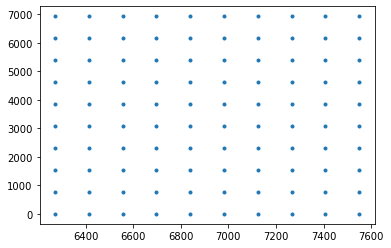

In [117]:
reload(sample)
pars = sample.grid_search('funcs_grid.csv', 'blah', 10, 10)
x = pars[pars['Term'] == 1]['DoseLevel']
y = pars[pars['Term'] == 4]['DoseLevel']
plt.plot(x, y, '.')

In [110]:
grid_vals

{('PTV 4/7/20',
  'DoseLevel'): array([6271.        , 6413.11111111, 6555.22222222, 6697.33333333,
        6839.44444444, 6981.55555556, 7123.66666667, 7265.77777778,
        7407.88888889, 7550.        ]),
 ('Esophagus',
  'DoseLevel'): array([   0.,  770., 1540., 2310., 3080., 3850., 4620., 5390., 6160.,
        6930.])}

In [89]:
np.logspace(0, 4)

array([1.00000000e+00, 1.20679264e+00, 1.45634848e+00, 1.75751062e+00,
       2.12095089e+00, 2.55954792e+00, 3.08884360e+00, 3.72759372e+00,
       4.49843267e+00, 5.42867544e+00, 6.55128557e+00, 7.90604321e+00,
       9.54095476e+00, 1.15139540e+01, 1.38949549e+01, 1.67683294e+01,
       2.02358965e+01, 2.44205309e+01, 2.94705170e+01, 3.55648031e+01,
       4.29193426e+01, 5.17947468e+01, 6.25055193e+01, 7.54312006e+01,
       9.10298178e+01, 1.09854114e+02, 1.32571137e+02, 1.59985872e+02,
       1.93069773e+02, 2.32995181e+02, 2.81176870e+02, 3.39322177e+02,
       4.09491506e+02, 4.94171336e+02, 5.96362332e+02, 7.19685673e+02,
       8.68511374e+02, 1.04811313e+03, 1.26485522e+03, 1.52641797e+03,
       1.84206997e+03, 2.22299648e+03, 2.68269580e+03, 3.23745754e+03,
       3.90693994e+03, 4.71486636e+03, 5.68986603e+03, 6.86648845e+03,
       8.28642773e+03, 1.00000000e+04])

In [92]:
np.log10(10)

1.0

In [91]:
np.log?